# Homework N - Andrew Schwartz - PHYS 403, SPR 2024

## 1. Coin Tossing: the Super Bowl

Super Bowl LVIII will be played on Sunday evening to decide the championship of the National Football League. Taylor Swift’s boyfriend is playing in the game. The annual Super Bowl game begins with a coin toss to determine which team controls the ball. Of the 57 games played between 1967 and 2023, the coin flip was tails 30 times and heads 27 times. 

The opposing teams in the Super Bowl always come from two “conferences,” the AFC and the NFC. Between 1998 and 2011, the NFC team won the coin toss 14 consecutive times. The streak ended in 2012 when the New England Patriots of the AFC won the coin toss.


### (a) 

Assuming the coin is fair, and that the Super Bowl is played once per year, how long should we expect to wait before seeing another streak of 14 consecutive coin toss wins by the NFC?

*Hint:* a good starting point is to consider how much time $t$ elapses if the streak ends on the first toss, versus the second toss (win + loss), or the third toss (win + win + loss), and so on. I.e., consider 2, 3, or 4 consecutive wins, writing down a relation for the elapsed time $t$ in each case. By induction, generalize to $n$ consecutive wins, and then substitute $n = 14$ and solve for $t$.

### Solution



### (b)

How likely is it that one conference would win 14 consecutive coin tosses by chance, starting this Sunday? Express in terms of the tail probability of a Gaussian PDF, converting to units of Gaussian $σ$ (e.g., your answer will be statement like “this is a $2σ$ effect”). Does it reach the magical $5σ$ level?

### Solution

## 2. Properties of the Mean, Variance, and Covariance

### (a)

Consider a random variable $x$ and constants $a$ and $b$. Show that
$$
\begin{align}
\langle ax+b\rangle&=a\langle x\rangle+b, &\text{var}(ax+b)&=a^2+\text{var}(x).
\end{align}
$$

### Solution

### (b)

Consider two random variables $x$ and $y$. Show that

$$
\begin{align}
\text{var}(ax+y)&=a^2\text{var}(x)+\text{var}(y)+2a\text{cov}(x,y) \\
&=a^2\text{var}(x)+\text{var}(y)+2a\rho\sigma_x\sigma_y,
\end{align}
$$

where $a$ is any constant, $\text{var}(x)=\sigma_x^2$, $\text{var}(y)=\sigma_y^2$, and $\rho=\text{cov}(x,y)/\sigma_x\sigma_y$.

### Solution

### (c)

Using the fact that $\text{var}(ax+y)\geq0$ and the result of part (b), show that $\rho\in[-1,1]$. *Hint: Consider the cases $a=\pm\sigma_y/\sigma_x$.*

### Solution

## 3. Fitting and the $\chi^2$ distribution

In this problem, we consider 1000 data sets generated randomly from $y = f(x) = x$, each with 10 data points. See the jupyter notebook.

In [262]:
from collections.abc import Iterable

import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.polynomial import polyfit
from scipy.stats import chi2

rng = np.random.default_rng()

In [276]:
iterify = lambda it: it if isinstance(it, Iterable) else [it]

In [277]:
n_points = 10
n = 1000
σ = 0.1

# 0.1 to 1 in increments of 0.1
x = np.linspace(0.1, 1, n_points)

# generate data centered around each point in x, n times
y = rng.normal(x, σ, (n, n_points))

### (a) 

Calculate the $\chi^2$ assuming the model $f(x) = x$. Plot the distribution. What is the number of degrees of freedom?

In [279]:
def plot_chi2(dof, ax=None):
    """plots a chi2 distribution on the given axes with a specified dof"""
    # plot from 0.1th percentile to 99.9th percentile
    x = np.linspace(chi2.ppf(0.001, dof), chi2.ppf(0.999, dof), 1000)
    ax = ax if ax is not None else plt
    ax.plot(x, chi2.pdf(x, dof), label="χ² Distribution")

In [318]:
def plot_chi2_fit(fx, σ=σ, dof=n_points):
    σ = iterify(σ)

    # calculate chi² fit with the given f(x) array
    chi2_fit = [np.sum(((y - fx) / σ) ** 2, axis=1) for σ in σ]

    # ploty plot plot plot :)
    fig, ax = plt.subplots(ncols=len(σ), figsize=(6.4 * len(σ), 4.8))
    axs = iterify(ax)
    for ax, chi2_fit in zip(axs, chi2_fit):
        ax.hist(chi2_fit, bins=50, density=True, label="Simulated data")
        if dof is not None:
            plot_chi2(dof, ax=ax)
        ax.legend(loc='best', frameon=False)
        ax.set_title(
            f"Chi-square distribution with {dof} degrees of freedom"
            if dof is not None
            else "Chi-square distribution"
        )
    plt.show()

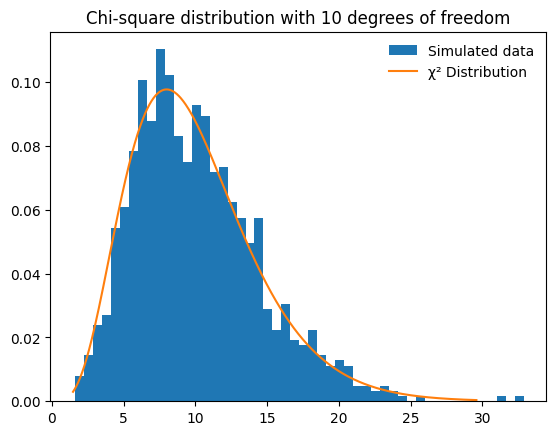

In [319]:
# plot with f(x)=x
plot_chi2_fit(x, dof=10)

### (b)

For each random data set, find the best-fit linear model $f(x) = mx + b$, and calculate the $\chi^2$ using this best-fit model. Plot the distribution. What is the number of degrees of freedom? Is it different from part (a)? Why or why not?


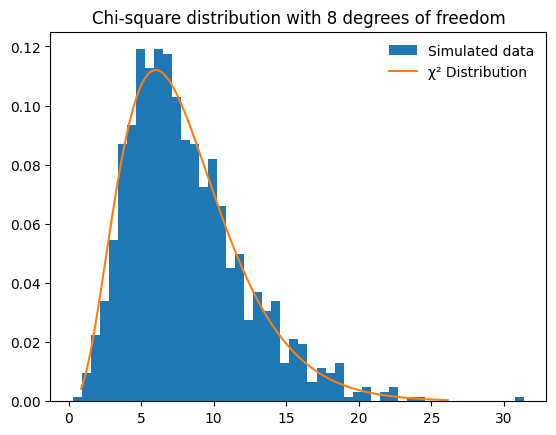

In [320]:
# fit the data with f(x)=mx+b
b, m = polyfit(x, y.T, 1)

# calculate f(x) for our x
f = np.outer(m, x) + np.outer(b, np.ones(n_points))

# plot with f(x) = mx+b
plot_chi2_fit(f, dof=8)

There are 2 less degrees of freedom, since we used 2 in the fitting parameters $m$ and $b$.

### (c)

Show what happens to the distribution of $\chi^2$s if the errors assumed in the $\chi^2$ calculation are too large or too small.

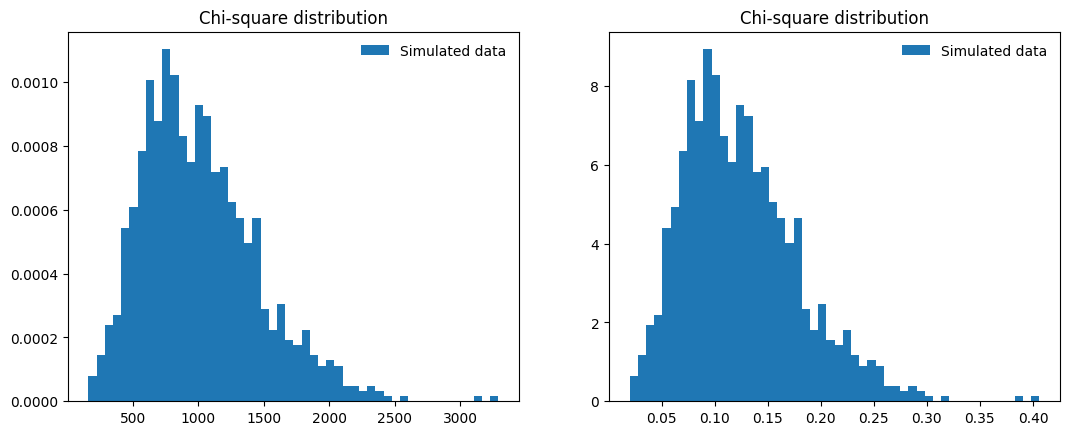

In [321]:
# with f(x)=x, and a tiny & huge error
plot_chi2_fit(x, [0.01, 0.9], dof=None)